In [8]:
import pandas as pd
from quality_anal_tool import QualityAnalTool

def add_rules(tool):
    tool.add_rule("Accurate",
                  lambda d: d["release_year"] < 1900,
                  "发行年份必须大于等于1900",
                  ["release_year"])
    tool.add_rule("Accurate",
                  lambda d: d["duration"].isnull() | ~d["duration"].astype(str).str.contains(r'\d+'),
                  "duration字段必须包含数字",
                  ["duration"])
    for theCol in ["title", "type", "release_year","rating"]:
        tool.add_rule("Complete",
                      lambda d, col=theCol: d[col].isnull(),
                      f"{theCol}字段不能为空",
                      [theCol])
    tool.add_rule("Unique",
                  lambda d: d.duplicated(subset=["show_id"]),
                  "show_id必须唯一",
                  ["show_id"])
    tool.add_rule("Up-to-date",
                  lambda d: d["date_added"].isnull(),
                  "date_added不能为空",
                  ["date_added"])
    tool.add_rule("Consistent",
                  lambda d: pd.to_datetime(d["date_added"], errors="coerce").isnull(),
                  "date_added必须是有效日期",
                  ["date_added"])
    tool.add_rule("Consistent",
                  lambda d: ~d["type"].isin(["Movie", "TV Show"]),
                  "type必须是Movie或TV Show",
                  ["type"])
    tool.add_rule("Consistent",
                  lambda d: ~d["rating"].isin(['PG-13','TV-MA','PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R' , 'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']),
                  "rating必须符合要求",
                  ["rating"])
    return

def data_anal(df: pd.DataFrame):
    # 初始化工具
    tool = QualityAnalTool(df)
    # 检测的规则
    add_rules(tool)

    # 执行质量检查
    results = tool.run()
    tool.summary(results)

import pandas as pd

def clean_duration(df: pd.DataFrame) -> pd.DataFrame:
    """删除duration为空的行"""
    df = df.dropna(subset=["duration"]).copy()
    return df


def clean_rating(df: pd.DataFrame) -> pd.DataFrame:
    """删除rating为空或不合法的行"""
    valid_ratings = [
        'PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
        'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'
    ]
    df = df.dropna(subset=["rating"]).copy()  # 删除 rating 是 NaN
    df = df[df["rating"].isin(valid_ratings)].copy()  # 删除 rating 不合法
    return df


def clean_date_added(df: pd.DataFrame) -> pd.DataFrame:
    """删除date_added为空或无效的行"""
    df = df.dropna(subset=["date_added"]).copy()  # 删除空
    df.loc[:, "date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
    df = df.dropna(subset=["date_added"]).copy()  # 删除无效日期
    return df


def data_process(df: pd.DataFrame) -> pd.DataFrame:
    """执行简单的数据清洗"""
    print("清洗前数据量：", len(df))
    df = clean_duration(df)
    df = clean_rating(df)
    df = clean_date_added(df)
    print("清洗后数据量：", len(df))
    return df


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


def data_visualization(df: pd.DataFrame):
    """可视化Netflix数据集"""
    # 设置样式
    sns.set_theme(style="whitegrid")

    # 1. type分布
    plt.figure(figsize=(6, 6))
    type_counts = df["type"].value_counts()
    plt.pie(type_counts, labels=type_counts.index, autopct="%1.1f%%", startangle=90)
    plt.title("Distribution of Type (Movie vs TV Show)")
    plt.tight_layout()
    plt.show()

    # 2. country分布（Top 10）
    plt.figure(figsize=(10, 6))
    country_counts = df["country"].dropna().str.split(", ").explode().value_counts().head(10)
    sns.barplot(x=country_counts.values, y=country_counts.index, palette="Blues_d")
    plt.xlabel("Count")
    plt.ylabel("Country")
    plt.title("Top 10 Countries by Number of Works")
    plt.tight_layout()
    plt.show()

    # 3. 历年新增作品数
    plt.figure(figsize=(12, 6))
    year_counts = df["release_year"].value_counts().sort_index()
    sns.lineplot(x=year_counts.index, y=year_counts.values, marker="o")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Works")
    plt.title("Number of Works Released by Year")
    plt.tight_layout()
    plt.show()

    # 4. 顶级导演
    plt.figure(figsize=(12, 6))
    director_counts = df["director"].dropna().str.split(", ").explode().value_counts().head(10)
    sns.barplot(x=director_counts.values, y=director_counts.index, palette="Greens_d")
    plt.xlabel("Number of Works")
    plt.ylabel("Director")
    plt.title("Top 10 Directors by Number of Works")
    plt.tight_layout()
    plt.show()

    # 5. 顶级演员
    plt.figure(figsize=(12, 6))
    actor_counts = df["cast"].dropna().str.split(", ").explode().value_counts().head(10)
    sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="Oranges_d", legend=False)
    plt.xlabel("Number of Works")
    plt.ylabel("Actor")
    plt.title("Top 10 Actors by Number of Works")
    plt.tight_layout()
    plt.show()

In [9]:
# 读取数据
csv_path = "netflix_titles.csv"
df = pd.read_csv(csv_path)

# 数据分析
data_anal(df)


=== Accurate 检查结果 ===
规则: 发行年份必须大于等于1900
不符合行数: 0
规则: duration字段必须包含数字
不符合行数: 3
违规详情:
duration
     NaN
     NaN
     NaN

=== Complete 检查结果 ===
规则: title字段不能为空
不符合行数: 0
规则: type字段不能为空
不符合行数: 0
规则: release_year字段不能为空
不符合行数: 0
规则: rating字段不能为空
不符合行数: 4
违规详情:
rating
   NaN
   NaN
   NaN
   NaN

=== Unique 检查结果 ===
规则: show_id必须唯一
不符合行数: 0

=== Up-to-date 检查结果 ===
规则: date_added不能为空
不符合行数: 10
违规详情:
date_added
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN
       NaN

=== Consistent 检查结果 ===
规则: date_added必须是有效日期
不符合行数: 98
违规详情:
         date_added
                NaN
     August 4, 2017
                NaN
  December 23, 2018
  December 15, 2018
       July 1, 2017
      July 26, 2019
       May 26, 2016
   November 1, 2019
   December 2, 2017
     March 15, 2019
    October 1, 2019
  December 15, 2017
       July 1, 2017
     August 4, 2017
      April 4, 2017
  December 28, 2016
     March 31, 2018
   February 1, 2019
    January 1, 2

In [10]:
# 数据处理
df = data_process(df)

清洗前数据量： 8807
清洗后数据量： 8702


In [11]:
data_anal(df)


=== Accurate 检查结果 ===
规则: 发行年份必须大于等于1900
不符合行数: 0
规则: duration字段必须包含数字
不符合行数: 0

=== Complete 检查结果 ===
规则: title字段不能为空
不符合行数: 0
规则: type字段不能为空
不符合行数: 0
规则: release_year字段不能为空
不符合行数: 0
规则: rating字段不能为空
不符合行数: 0

=== Unique 检查结果 ===
规则: show_id必须唯一
不符合行数: 0

=== Up-to-date 检查结果 ===
规则: date_added不能为空
不符合行数: 0

=== Consistent 检查结果 ===
规则: date_added必须是有效日期
不符合行数: 0
规则: type必须是Movie或TV Show
不符合行数: 0
规则: rating必须符合要求
不符合行数: 0


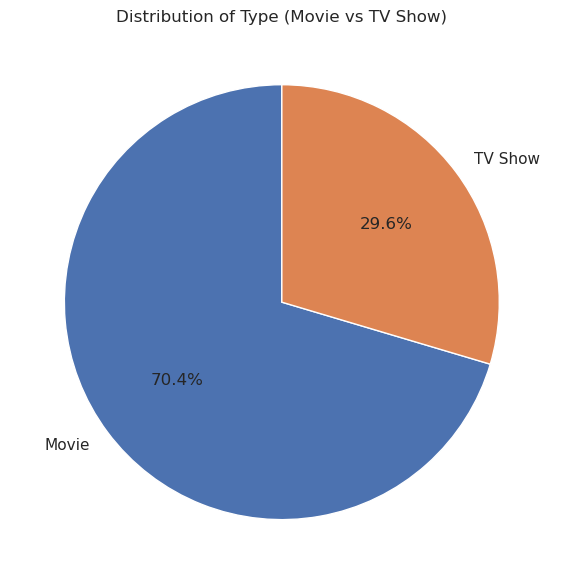

/tmp/ipykernel_9654/2564709206.py:108: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette="Blues_d")


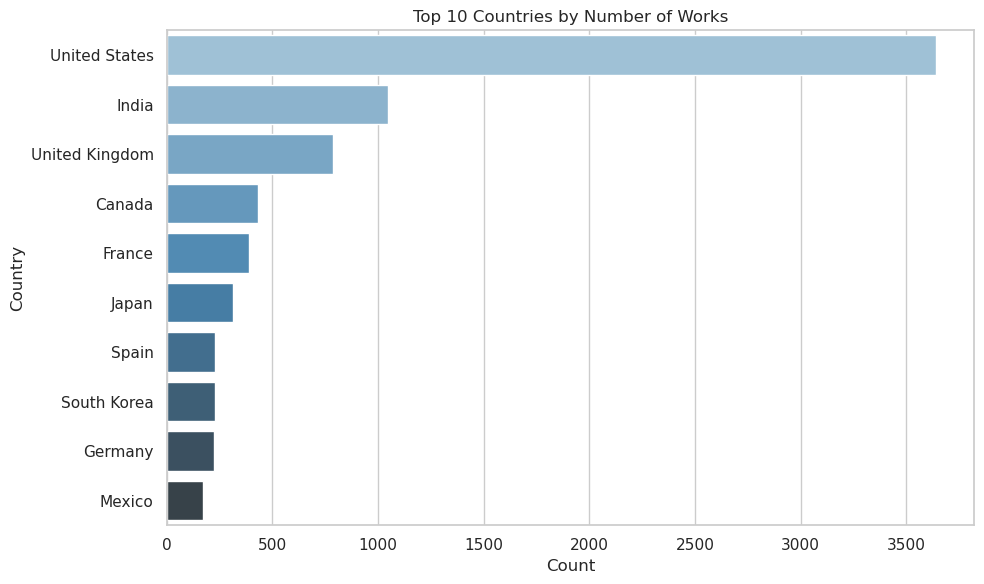

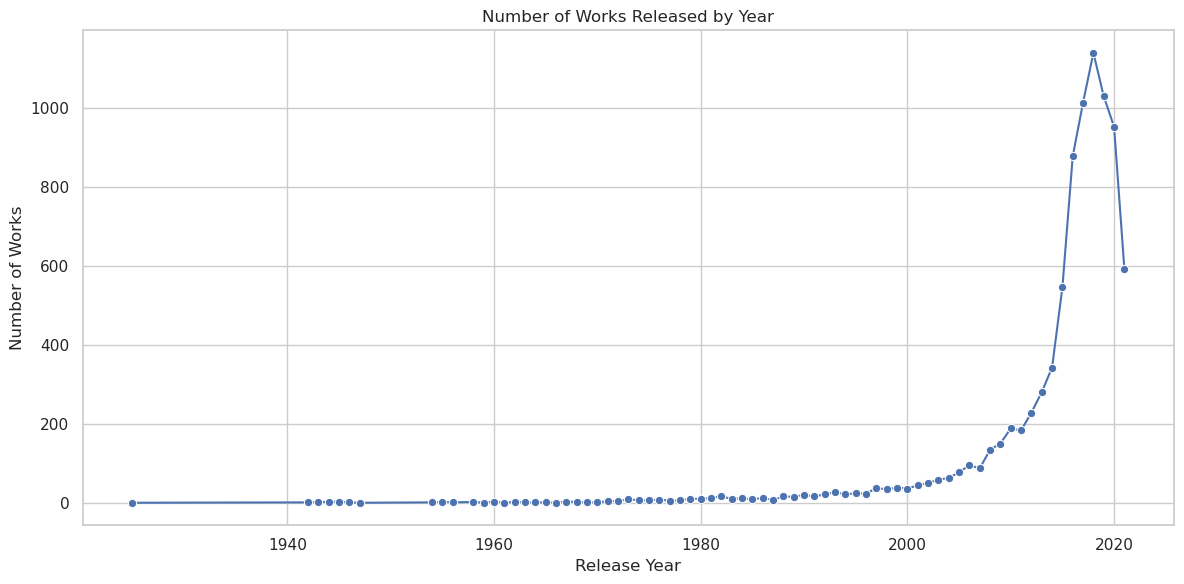

/tmp/ipykernel_9654/2564709206.py:128: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_counts.values, y=director_counts.index, palette="Greens_d")


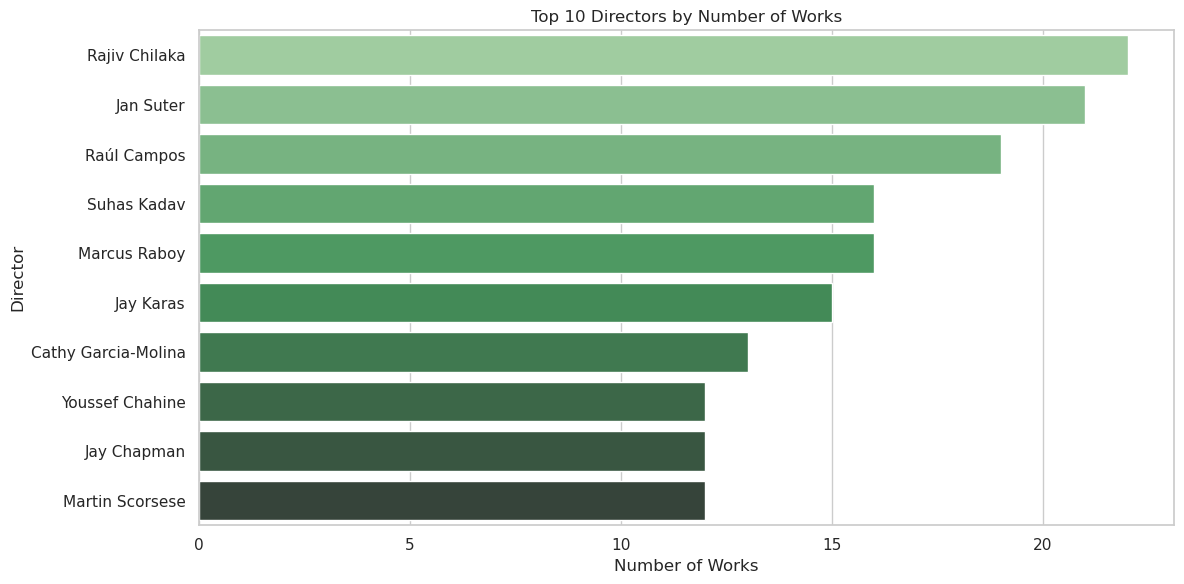

/tmp/ipykernel_9654/2564709206.py:138: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=actor_counts.values, y=actor_counts.index, palette="Oranges_d", legend=False)


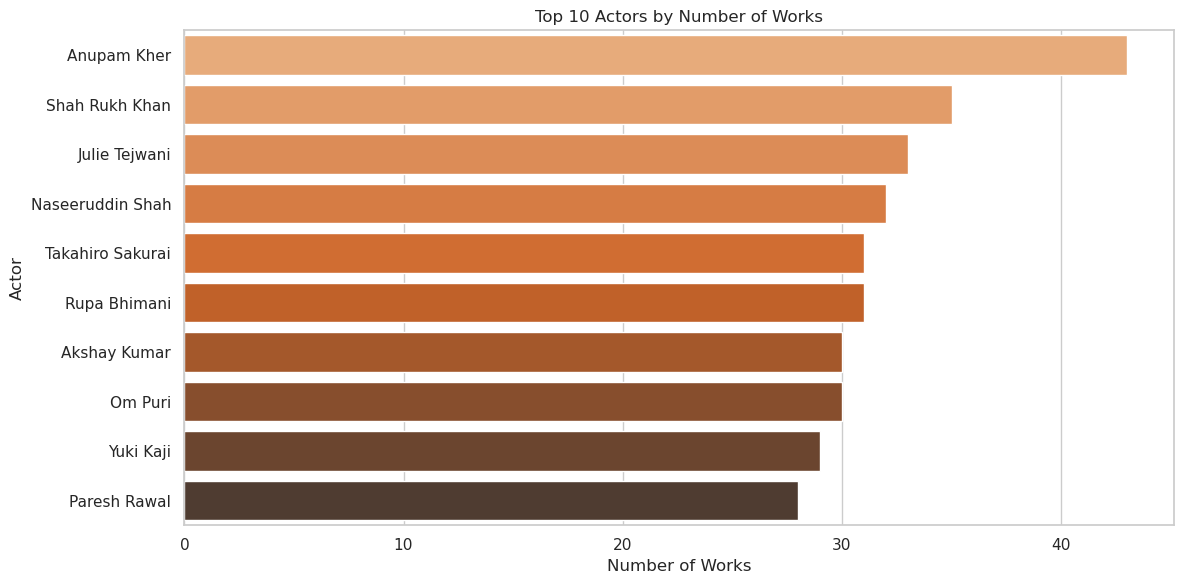

In [12]:
data_visualization(df)